# TP2

- Autor: Leandro Saraco
- Año 2024

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [35]:
def imshow(title,img,figsize=(12,8)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    plt.show()

## Implementación de la funcion create_gauss_filter

In [59]:
def create_gauss_filter(h, w, k_size=5, sigma=5):
    kernel_1d = cv.getGaussianKernel(ksize=k_size, sigma=sigma) 
    kernel = kernel_1d * kernel_1d.T
    m, n = kernel.shape
    if w < m or h < n:
        raise ValueError("El tamaño del kernel no puede ser más grande que el de la imagen")
    #Obtengo centro de la imagen menos mitad del tamaño del kernel
    y, x = (w - m) // 2, (h - n) // 2
    #Creo el filtro todo con ceros y en el centro el kernel
    filter = np.zeros((w, h))
    filter[y:y+m, x:x+n] = kernel
    filter_freq = np.fft.fft(filter)
    return (filter,filter_freq)

Prueba de filtrado espacial comparando con GaussianBlur de openCV

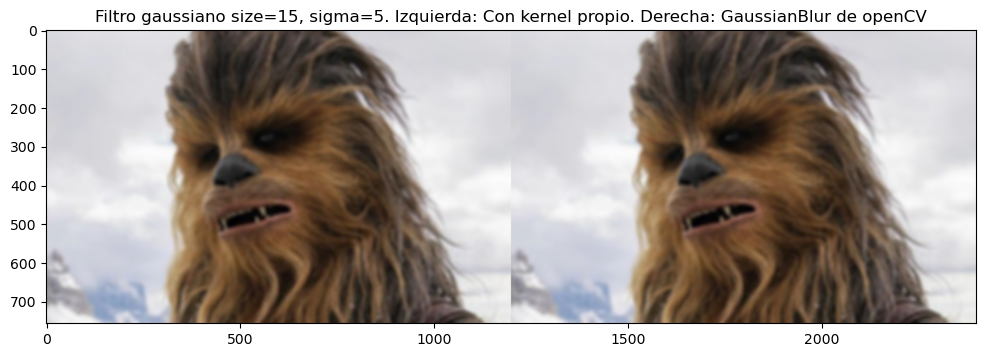

In [74]:
# Cargo imagen y seteo valores
img_orig = cv.imread('chewbacca.jpg')
k_size = 15
sigma = 5

# Creo kernel gaussiano con la función propia
kernel, kernel_tf = create_gauss_filter(img_orig.shape[0],img_orig.shape[1], k_size=k_size, sigma=sigma)
 
# Aplicamos el filtro Gaussiano
result_a = cv.filter2D(img_orig,  ddepth=-1, kernel=kernel)

# Lo mismo pero hecho todo con openCV, para comparar
result_b = cv.GaussianBlur(img_orig, ksize=(k_size, k_size), sigmaX=sigma,  sigmaY=sigma)

# Pongo uno al lado del otro
result = cv.hconcat([result_a,result_b])




imshow(f"Filtro gaussiano size={k_size}, sigma={sigma}. Izquierda: Con kernel propio. Derecha: GaussianBlur de openCV",result)

Prueba de filtrado con FFT y comparando con GaussianBlur de openCV

In [ ]:
kernel_tf
img_orig

## 1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma

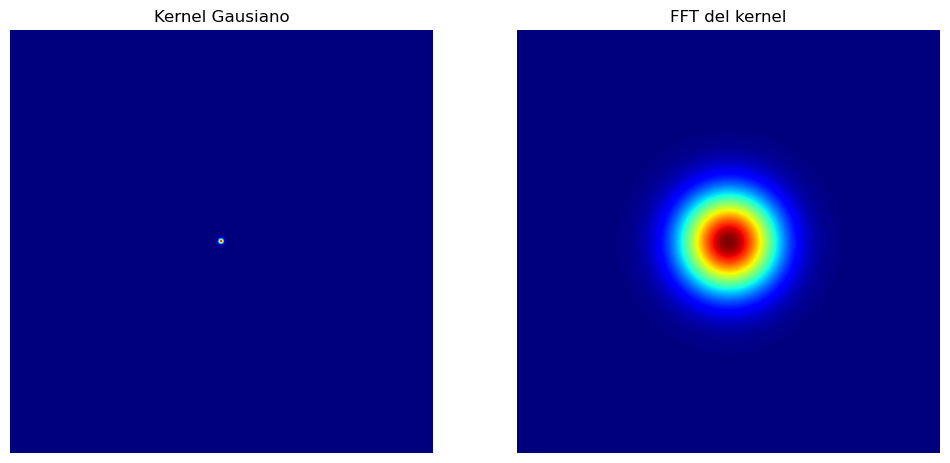

In [12]:
kernel, kernel_tf = create_gauss_filter(500,500, k_size=15, sigma=2)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

In [ ]:
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')